<a href="https://colab.research.google.com/github/njagaty/Machine-leaning-Projects/blob/main/Predicting_Stock_25022023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -q yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.8 MB/s eta 0:00:00


In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-17,97.800003,97.940002,95.650002,97.199997,97.199997,59967700,AMAZON
2023-02-21,95.339996,95.610001,94.269997,94.580002,94.580002,56580400,AMAZON
2023-02-22,95.099998,97.010002,94.800003,95.790001,95.790001,59534100,AMAZON
2023-02-23,96.120003,96.430000,93.669998,95.820000,95.820000,48467000,AMAZON
2023-02-24,93.529999,94.139999,92.318604,93.500000,93.500000,53315422,AMAZON


In [7]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,150.666693,152.773466,148.699921,150.829562,150.288875,8.434731e+07
std,12.175499,12.093437,12.199862,12.193954,12.014910,2.335144e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.110001,143.854996,139.949997,142.464996,141.973434,6.891710e+07
50%,149.309998,151.300003,147.460007,149.839996,149.471771,7.947100e+07
75%,159.824997,162.375000,156.930000,158.715004,157.953186,9.347200e+07
max,178.550003,179.610001,176.699997,178.960007,177.882446,1.826020e+08


In [8]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,109.151769,110.729639,107.680476,109.189207,109.189207,2.835818e+07
std,14.537547,14.608846,14.381509,14.523950,14.523950,1.079115e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,97.645000,99.414497,96.274998,97.700001,97.700001,2.169680e+07
50%,108.879997,110.580002,107.010002,108.800003,108.800003,2.589800e+07
75%,116.857502,118.827251,115.435749,117.368999,117.368999,3.212100e+07
max,143.399506,144.162506,142.483994,143.642502,143.642502,9.779860e+07


In [9]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,260.616534,263.902390,257.195298,260.652908,259.049371,2.985761e+07
std,22.058591,21.965173,21.727260,22.019515,21.386222,9.784444e+06
min,217.550003,220.410004,213.429993,214.250000,213.114120,9.200800e+06
25%,243.160004,245.305000,240.264999,242.354996,241.440262,2.292385e+07
50%,257.890015,260.890015,254.309998,258.059998,256.721680,2.835120e+07
75%,277.600006,281.194992,274.429993,276.440002,274.508865,3.362295e+07
max,313.910004,315.950012,311.579987,315.410004,312.345795,8.610200e+07


In [10]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,117.647006,119.654323,115.455501,117.562532,117.562532,7.487665e+07
std,22.377035,22.531246,22.133104,22.331541,22.331541,3.051665e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,98.325001,100.375000,96.915001,98.364998,98.364998,5.544485e+07
50%,114.080002,116.580002,112.627998,114.410004,114.410004,6.702980e+07
75%,134.410004,136.405006,132.630005,133.709999,133.709999,8.488045e+07
max,170.384003,170.831497,167.868500,169.315002,169.315002,2.726620e+08


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-02-25 to 2023-02-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


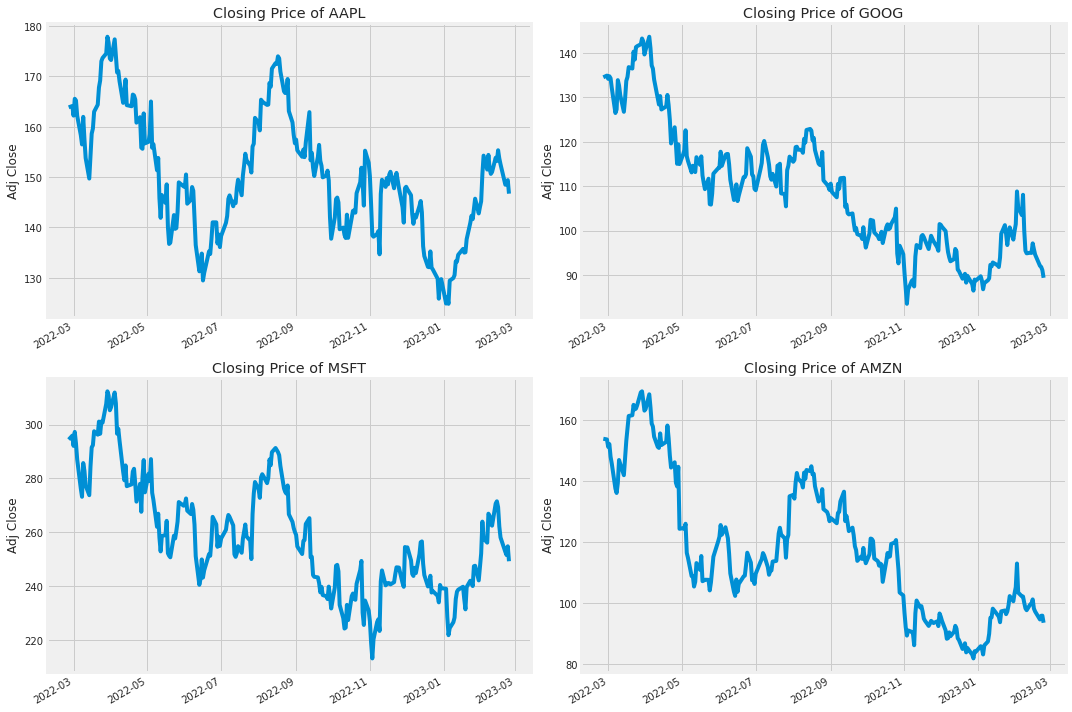

In [12]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

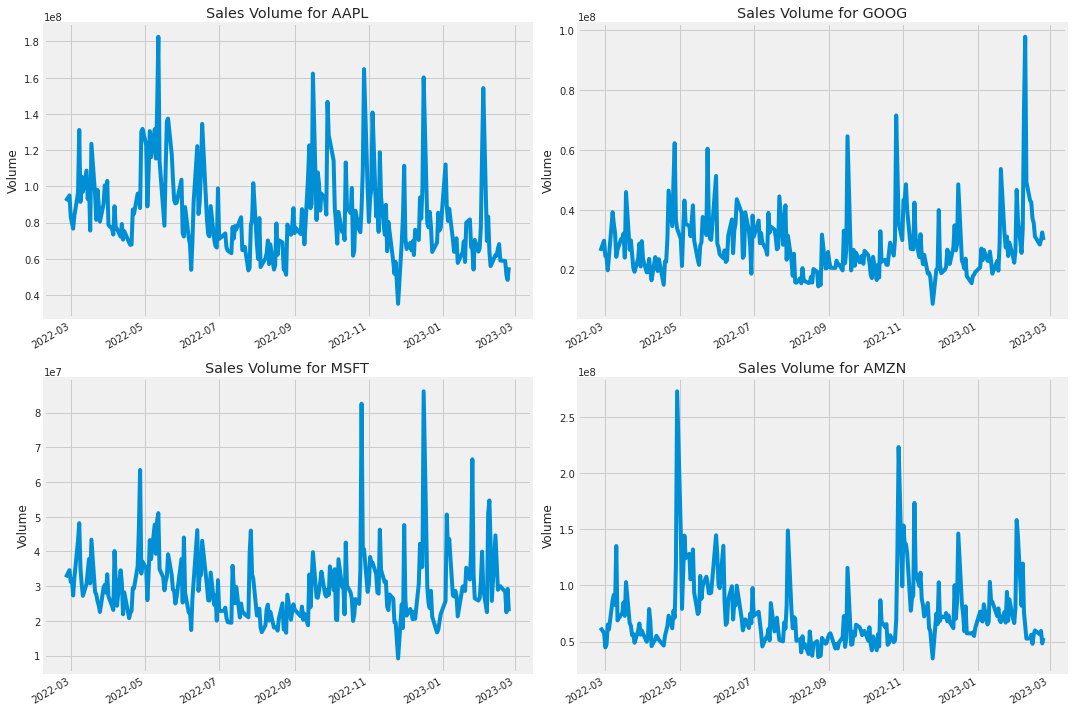

In [13]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

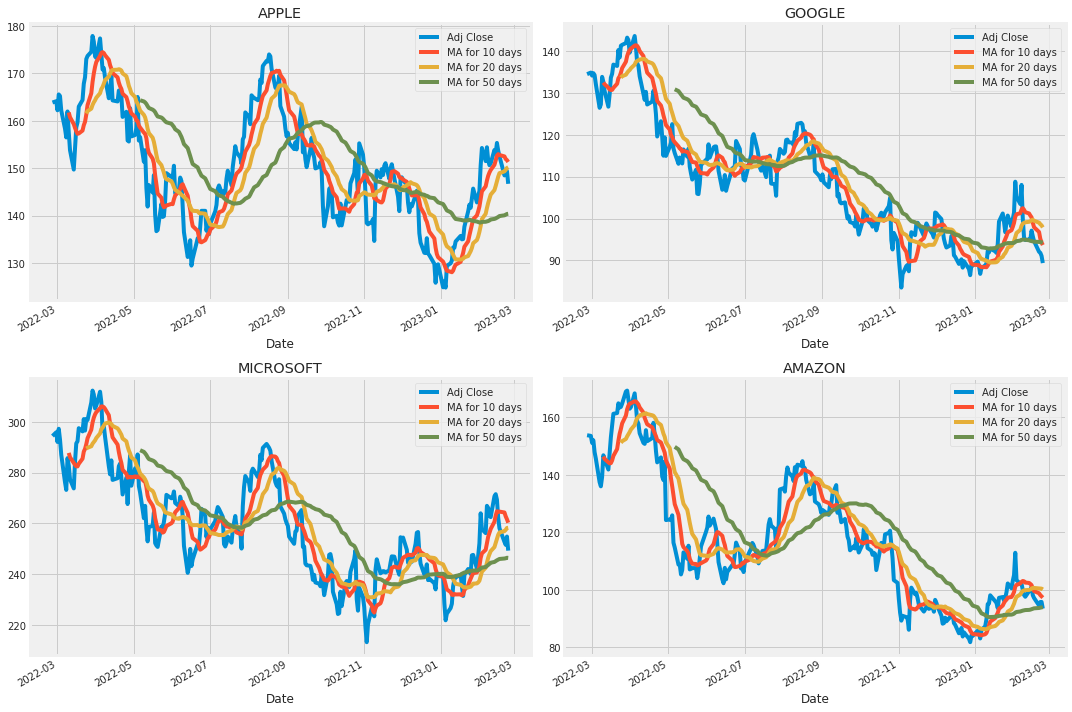

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

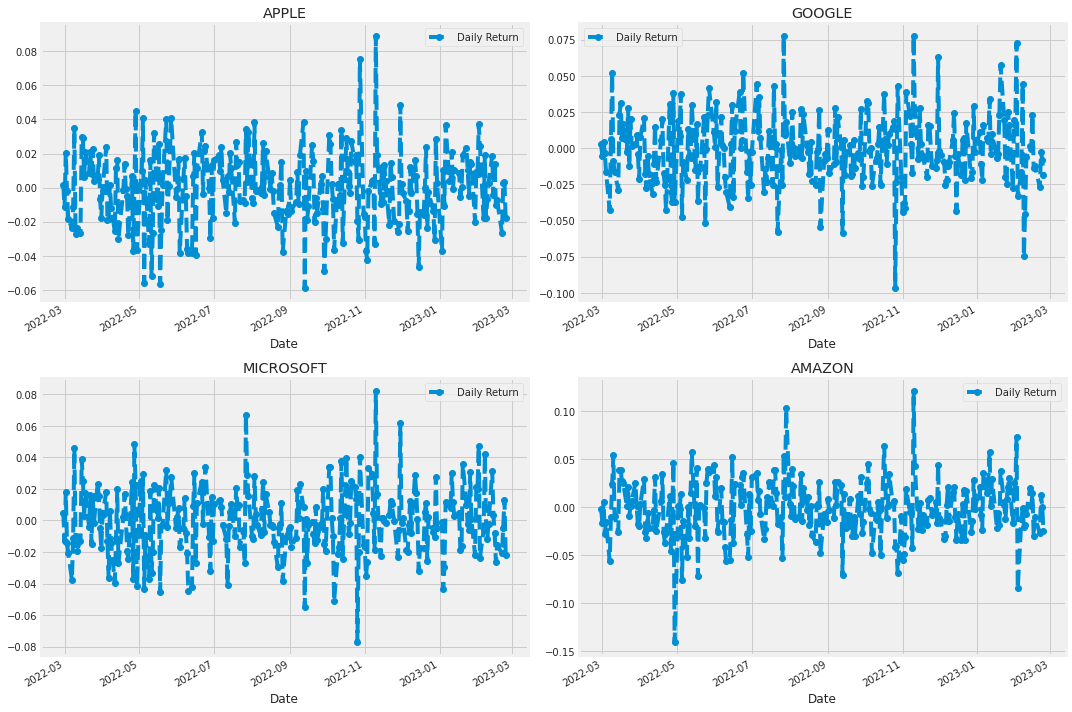

In [15]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

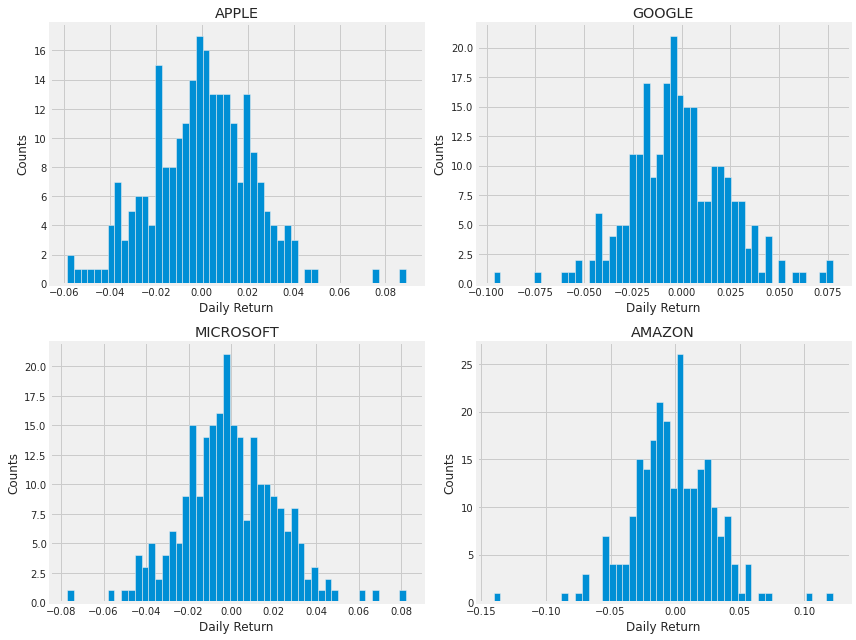

In [16]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [17]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-02-25,NaN,NaN,NaN,NaN
2022-02-28,0.001638,-0.001466,0.002762,0.004978
2022-03-01,-0.011628,-0.015766,-0.005360,-0.012852
2022-03-02,0.020588,0.006024,0.004349,0.017766
2022-03-03,-0.001981,-0.027320,-0.003291,-0.014224


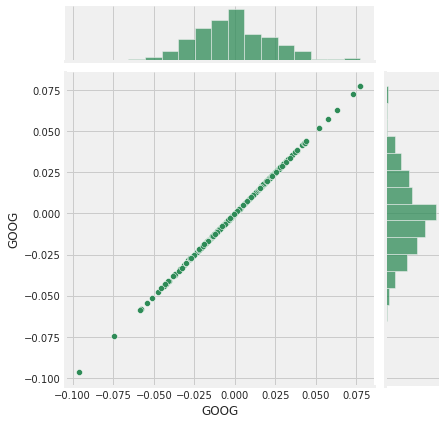

In [18]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

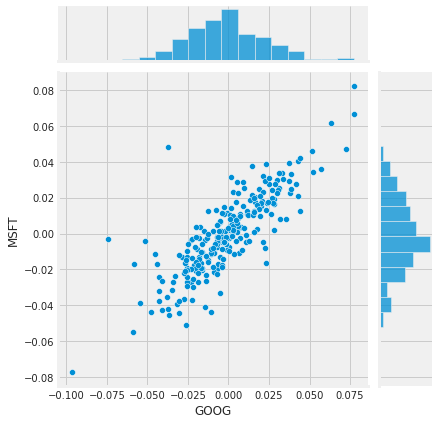

In [19]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

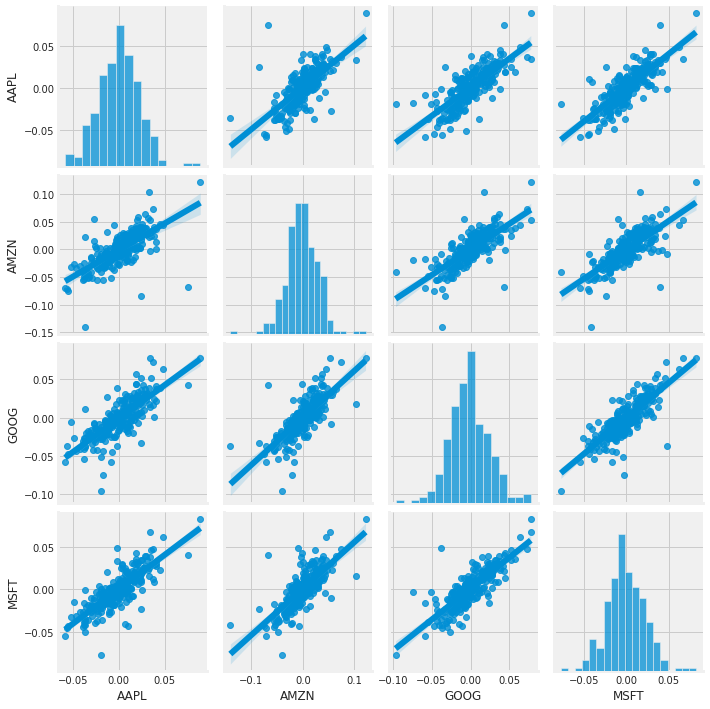

In [20]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

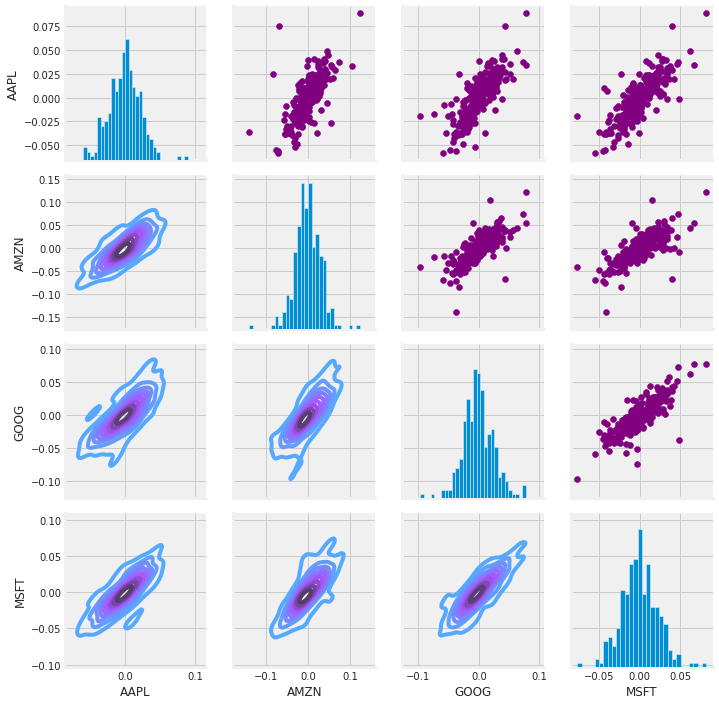

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

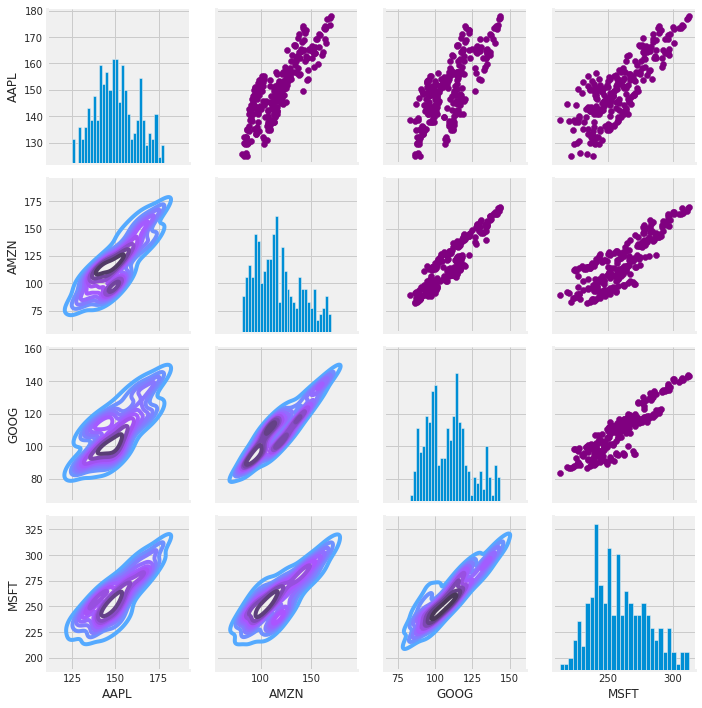

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

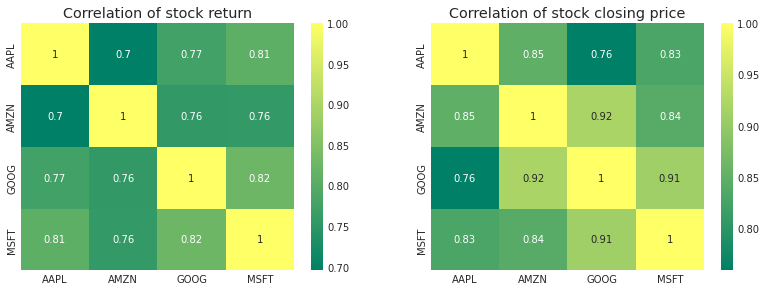

In [23]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

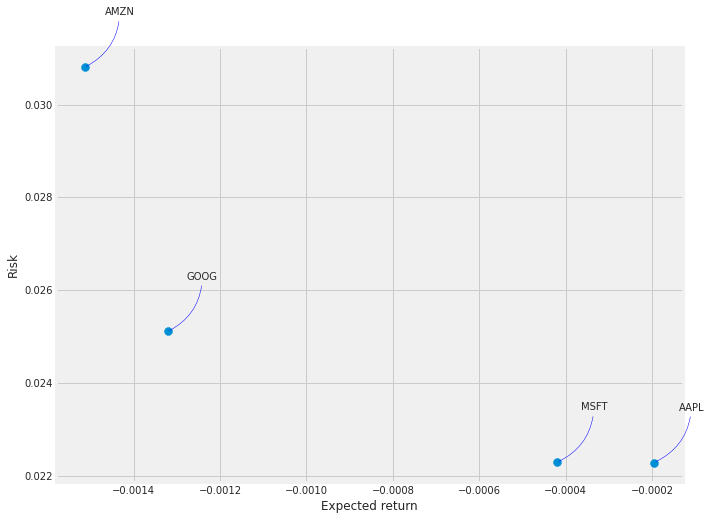

In [24]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [25]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500195,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567372,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706894,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839728,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819363,394024400
...,...,...,...,...,...,...
2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59095900
2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200
2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300


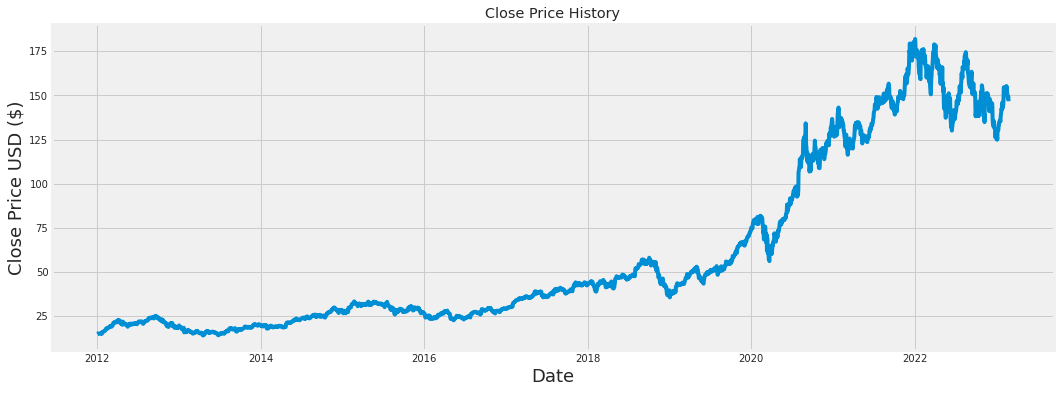

In [26]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [27]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2665

In [28]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.80304951],
       [0.80596503],
       [0.78995916]])

In [29]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2605/2605 [==============================] - 115s 42ms/step - loss: 0.0013


In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 3s 106ms/step


4.469657778980554

<ipython-input-32-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


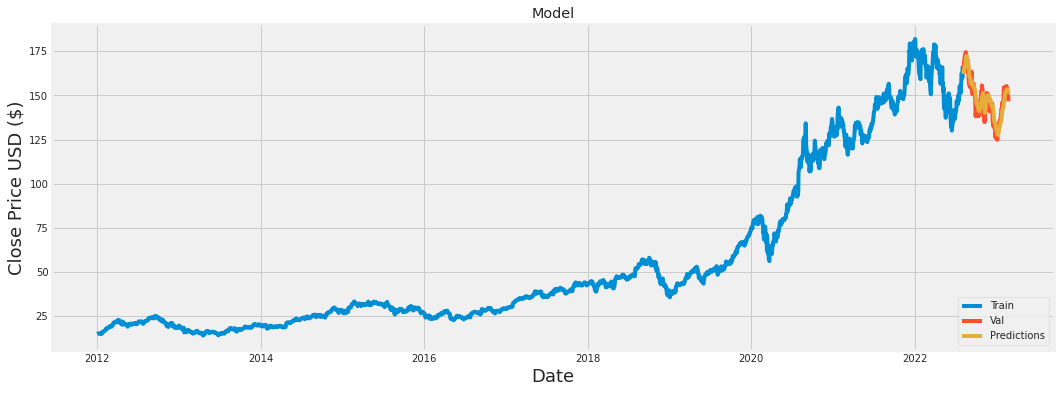

In [32]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-08-05,165.350006,162.229721
2022-08-08,164.869995,163.361710
2022-08-09,164.919998,164.042572
2022-08-10,169.240005,164.435318
2022-08-11,168.490005,165.434723
...,...,...
2023-02-17,152.550003,153.487396
2023-02-21,148.479996,153.485748
2023-02-22,148.910004,152.607010


Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

How to load stock market data from the YAHOO Finance website using yfinance.
How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
How to measure the correlation between stocks.
How to measure the risk of investing in a particular stock.